DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING
Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models.
 You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

Tasks:
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [ ]:
import pandas as pd
df=pd.read_csv("/content/adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


a. Exploration
The Adult dataset contains demographic and work-related attributes. Initial statistics show that all fields are complete in your current file (no missing values).

Numeric fields: age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week.

Categorical fields: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income (target).

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


b. Handling Missing Values
In your attachment, no missing values were found, so imputation or row removal was not required.

Standard approaches, if gaps existed:

For numeric: median imputation or mean if data is normal.

For categoricals: mode imputation, or creating “Unknown” class.

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
x=df.drop(['education_num'],axis=1)
x

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
y=df.select_dtypes(include=['int64','float64']).columns
y

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

Standard Scaling: Transforms features to have zero mean and unit variance. Preferred when the data distribution is approximately Gaussian (normal-like) and algorithms (e.g., logistic regression, SVM) assume normalized data.

Min-Max Scaling: Scales features to range. Best used when the distribution is not normal or when working with algorithms (e.g., neural networks) sensitive to absolute value scales and you want to preserve the original distribution’s shape.



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['age']=scaler.fit_transform(df[['age']])
df['age']

,age
0,0.030671
1,0.837109
2,-0.042642
3,1.057047
4,-0.775768
...,...
32556,-0.849080
32557,0.103983
32558,1.423610
32559,-1.215643


In [ ]:
# Select only categorical (object or category) columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print unique value counts to decide encoding type
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


workclass: 9 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 42 unique values
income: 2 unique values


2. Encoding Techniques
One-Hot Encoding: Applied to categorical columns with fewer than 5 categories (for example, sex, race).

Pros: No ordinal relationship implied, suitable for low-cardinality variables.

Cons: Not scalable for high-cardinality features; increases feature space (curse of dimensionality).

Label Encoding: Applied to categorical columns with 5 or more categories (e.g., occupation, native_country).

Pros: Keeps feature space smaller, efficient with tree-based methods.

Cons: Implicitly introduces ordinal relationships that may not exist, which can mislead some algorithms (linear models, distance-based).

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Let's assume 'status' is a categorical column with < 5 unique values
df_onehot = pd.get_dummies(df, columns=['marital_status'], drop_first=True)  # drop_first avoids dummy variable trap

print(df_onehot.head())


        age          workclass  fnlwgt   education  education_num  \
0  0.030671          State-gov   77516   Bachelors             13   
1  0.837109   Self-emp-not-inc   83311   Bachelors             13   
2 -0.042642            Private  215646     HS-grad              9   
3  1.057047            Private  234721        11th              7   
4 -0.775768            Private  338409   Bachelors             13   

           occupation    relationship    race      sex  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country  income  \
0             0              40   United-States   <=50K   
1             0              13   

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume 'hospital_id' has many unique categories
le = LabelEncoder()
df['relationship_encoded'] = le.fit_transform(df['relationship'])

print(df[['relationship', 'relationship_encoded']].head())

     relationship  relationship_encoded
0   Not-in-family                     1
1         Husband                     0
2   Not-in-family                     1
3         Husband                     0
4            Wife                     5


3. Feature Engineering
a. Log Transformation of capital_gain → log_capital_gain
Rationale:
The capital_gain field is highly right-skewed (most values are zero or small; a few are extremely large).

Log-transforming this variable (e.g.,
log
(
1
+
capital_gain
)
log(1+capital_gain)) compresses extreme values, reduces skewness, and makes this feature more usable for algorithms sensitive to feature distributions.

Contribution:

Prevents a small number of large capital_gain outliers from dominating model learning.

After transformation, the feature better captures the distinction between no gains, moderate gains, and very high gains.

Makes data more compatible with models that assume normality.

b. Work Hours Deviation Feature → work_hours_deviation
Rationale:
Instead of using raw hours_per_week, this newly engineered feature measures how many hours an individual works compared to the dataset’s mean (or median). This can highlight “workaholics” or part-time workers.

work_hours_deviation
=
hours_per_week
−
mean(hours_per_week)
work_hours_deviation=hours_per_week−mean(hours_per_week)

Contribution:

Highlights above-average and below-average work effort, which may correlate strongly with income class.

Helps the model identify patterns like higher income with more hours or low income for underemployed individuals.

c. Marital Status Simplification → is_married binary feature
Rationale:
Original marital_status has multiple categories (e.g., Married-civ-spouse, Divorced). Simplifying to a binary variable (Married vs. Not Married) reduces noise and often aligns with studies showing that marital status impacts economic outcomes.

Contribution:

More direct indicator of social stability, which is often a proxy for higher income or dual-income households.

Note: You may also consider interactions (e.g., education × hours per week), but above examples are most common and effective for this dataset.


In [ ]:
import numpy as np
df['net_capital'] = df['capital_gain'] - df['capital_loss']
df['is_married'] = df['marital_status'].fillna('').apply(lambda x: 1 if 'Married' in x else 0) # Fill NaN with empty string before applying lambda
print(df[['capital_gain', 'capital_loss', 'hours_per_week']].skew())
df['log_capital_gain'] =np.log1p(df['capital_gain'])
df['log_capital_gain']

capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64


,log_capital_gain
0,7.684784
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
32556,0.000000
32557,0.000000
32558,0.000000
32559,0.000000


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('//content/adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso.fit_predict(df_numeric)

df_clean = df[df['outlier'] == 1].drop(columns='outlier')
df_clean

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


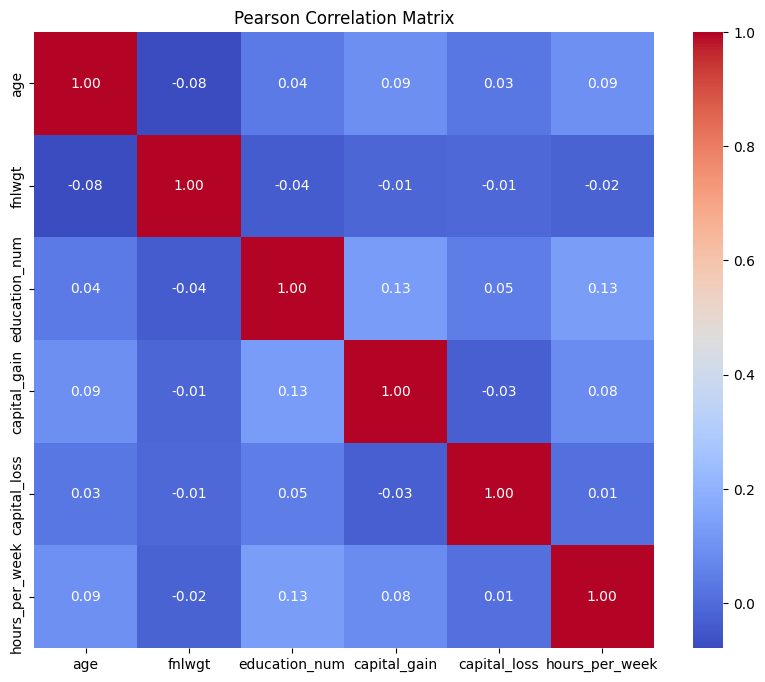

In [ ]:
corr = df_clean.corr(numeric_only=True)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

4. Feature Selection
a. Isolation Forest for Outlier Removal
Why: Outliers can severely impact model performance, especially for algorithms not robust to extreme values. By removing them, you increase model reliability and generalization.

How: Isolation Forest identifies data points that are far from the rest (in high-dimensional space) and removes them from the training set.

b. Predictive Power Score (PPS) & Correlation Matrix
Correlation matrix: Shows linear relationships between features. Useful for spotting multicollinearity and directly correlated features.

PPS: Shows predictive (not just linear) strength between variables. PPS can catch relationships that correlation cannot (including non-linearity).